In [1]:
import matplotlib.pyplot as plt
import config

from job.extraction import extract
from job.transformation import transform

In [2]:
data = extract(config.GOOGLE_CREDENTIALS_POLITICIANS)
sentiments_dict = transform(data["df"], data["websites"])

/home/brudhu/projetos/pessoais/politicians_analysis/data_analysis/job/transformation/percentages/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  percentage = values[keyword]["dfs"][website]["headline"].count() / sentiments_dict["all"][keyword]["dfs"][website]["headline"].count()


Text(0, 0.5, 'Average sentiment score')

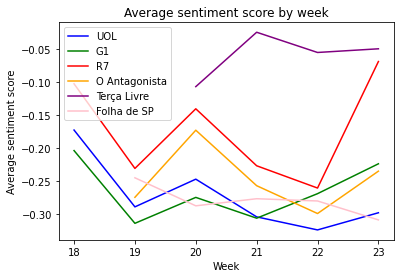

In [3]:
all_sentiments_dict = sentiments_dict["all"]

df_uol_all = all_sentiments_dict["Bolsonaro"]["dfs"]["UOL"]
df_uol_all["week"] = df_uol_all["onlineStartDate"].dt.strftime('%W')
df_uol_week_group = df_uol_all.groupby("week").describe()
plt.plot(df_uol_week_group.index, df_uol_week_group["sentimentScore"]["mean"], color="blue")

df_g1_all = all_sentiments_dict["Bolsonaro"]["dfs"]["G1"]
df_g1_all["week"] = df_g1_all["onlineStartDate"].dt.strftime('%W')
df_g1_week_group = df_g1_all.groupby("week").describe()
plt.plot(df_g1_week_group.index, df_g1_week_group["sentimentScore"]["mean"], color="green")

df_r7_all = all_sentiments_dict["Bolsonaro"]["dfs"]["R7"]
df_r7_all["week"] = df_r7_all["onlineStartDate"].dt.strftime('%W')
df_r7_week_group = df_r7_all.groupby("week").describe()
plt.plot(df_r7_week_group.index, df_r7_week_group["sentimentScore"]["mean"], color="red")

df_antagonista_all = all_sentiments_dict["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all["week"] = df_antagonista_all["onlineStartDate"].dt.strftime('%W')
df_antagonista_week_group = df_antagonista_all.groupby("week").describe()
plt.plot(df_antagonista_week_group.index, df_antagonista_week_group["sentimentScore"]["mean"], color="orange")

df_tercalivre_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all["week"] = df_tercalivre_all["onlineStartDate"].dt.strftime('%W')
df_tercalivre_week_group = df_tercalivre_all.groupby("week").describe()
plt.plot(df_tercalivre_week_group.index, df_tercalivre_week_group["sentimentScore"]["mean"], color="purple")

df_folha_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all["week"] = df_folha_all["onlineStartDate"].dt.strftime('%W')
df_folha_week_group = df_folha_all.groupby("week").describe()
plt.plot(df_folha_week_group.index, df_folha_week_group["sentimentScore"]["mean"], color="pink")

plt.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
plt.title("Average sentiment score by week")
plt.xlabel("Week")
plt.ylabel("Average sentiment score")

Text(0, 0.5, 'Average sentiment score')

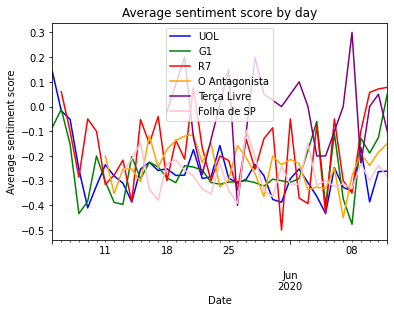

In [5]:
all_sentiments_dict = sentiments_dict["all"]


df_uol_all = all_sentiments_dict["Bolsonaro"]["dfs"]["UOL"]
df_uol_all["onlineStartDate"] = df_uol_all["onlineStartDate"].dt.floor('d')
df_uol_grouped_describe = df_uol_all.groupby("onlineStartDate").describe()
df_uol_grouped_describe["sentimentScore"]["mean"].plot(color="blue")

df_g1_all = all_sentiments_dict["Bolsonaro"]["dfs"]["G1"]
df_g1_all["onlineStartDate"] = df_g1_all["onlineStartDate"].dt.floor('d')
df_g1_grouped_describe = df_g1_all.groupby("onlineStartDate").describe()
df_g1_grouped_describe["sentimentScore"]["mean"].plot(color="green")

df_r7_all = all_sentiments_dict["Bolsonaro"]["dfs"]["R7"]
df_r7_all["onlineStartDate"] = df_r7_all["onlineStartDate"].dt.floor('d')
df_r7_grouped_describe = df_r7_all.groupby("onlineStartDate").describe()
df_r7_grouped_describe["sentimentScore"]["mean"].plot(color="red")

df_antagonista_all = all_sentiments_dict["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all["onlineStartDate"] = df_antagonista_all["onlineStartDate"].dt.floor('d')
df_antagonista_grouped_describe = df_antagonista_all.groupby("onlineStartDate").describe()
df_antagonista_grouped_describe["sentimentScore"]["mean"].plot(color="orange")

df_tercalivre_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all["onlineStartDate"] = df_tercalivre_all["onlineStartDate"].dt.floor('d')
df_tercalivre_grouped_describe = df_tercalivre_all.groupby("onlineStartDate").describe()
df_tercalivre_grouped_describe["sentimentScore"]["mean"].plot(color="purple")

# df_sensoincomum_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all["onlineStartDate"] = df_sensoincomum_all["onlineStartDate"].dt.floor('d')
# df_sensoincomum_grouped_describe = df_sensoincomum_all.groupby("onlineStartDate").describe()
# df_sensoincomum_grouped_describe["sentimentScore"]["mean"].plot(marker="x", color="gray")

df_folha_all = all_sentiments_dict["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all["onlineStartDate"] = df_folha_all["onlineStartDate"].dt.floor('d')
df_folha_grouped_describe = df_folha_all.groupby("onlineStartDate").describe()
ax = df_folha_grouped_describe["sentimentScore"]["mean"].plot(color="pink")

ax.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"])
ax.set_title("Average sentiment score by day")
ax.set_xlabel("Date")
ax.set_ylabel("Average sentiment score")

Text(0, 0.5, 'Percentage of negative headlines')

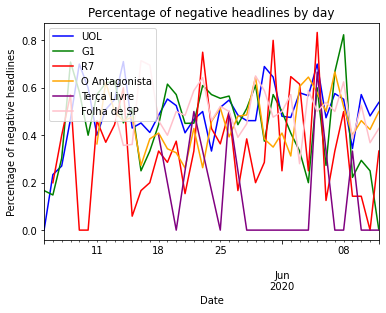

In [6]:
df_uol_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_negatives["onlineStartDate"] = df_uol_negatives["onlineStartDate"].dt.floor('d')
df_uol_negatives_count = df_uol_negatives.groupby("onlineStartDate").count()

df_uol_all["onlineStartDate"] = df_uol_all["onlineStartDate"].dt.floor('d')
df_uol_all_count = df_uol_all.groupby("onlineStartDate").count()
uol_negative_percentages_by_day = df_uol_negatives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_negative_percentages_by_day = uol_negative_percentages_by_day.fillna(0)
uol_negative_percentages_by_day.plot(color="blue")


df_g1_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_negatives["onlineStartDate"] = df_g1_negatives["onlineStartDate"].dt.floor('d')
df_g1_negatives_count = df_g1_negatives.groupby("onlineStartDate").count()

df_g1_all["onlineStartDate"] = df_g1_all["onlineStartDate"].dt.floor('d')
df_g1_all_count = df_g1_all.groupby("onlineStartDate").count()
g1_negative_percentages_by_day = df_g1_negatives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_negative_percentages_by_day = g1_negative_percentages_by_day.fillna(0)
g1_negative_percentages_by_day.plot(color="green")


df_r7_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_negatives["onlineStartDate"] = df_r7_negatives["onlineStartDate"].dt.floor('d')
df_r7_negatives_count = df_r7_negatives.groupby("onlineStartDate").count()

df_r7_all["onlineStartDate"] = df_r7_all["onlineStartDate"].dt.floor('d')
df_r7_all_count = df_r7_all.groupby("onlineStartDate").count()
r7_negative_percentages_by_day = df_r7_negatives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_negative_percentages_by_day = r7_negative_percentages_by_day.fillna(0)
r7_negative_percentages_by_day.plot(color="red")


df_antagonista_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_negatives["onlineStartDate"] = df_antagonista_negatives["onlineStartDate"].dt.floor('d')
df_antagonista_negatives_count = df_antagonista_negatives.groupby("onlineStartDate").count()

df_antagonista_all["onlineStartDate"] = df_antagonista_all["onlineStartDate"].dt.floor('d')
df_antagonista_all_count = df_antagonista_all.groupby("onlineStartDate").count()
antagonista_negative_percentages_by_day = df_antagonista_negatives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_negative_percentages_by_day = antagonista_negative_percentages_by_day.fillna(0)
antagonista_negative_percentages_by_day.plot(color="orange")


df_tercalivre_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Terça Livre"]
df_tercalivre_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Terça Livre"]

df_tercalivre_negatives["onlineStartDate"] = df_tercalivre_negatives["onlineStartDate"].dt.floor('d')
df_tercalivre_negatives_count = df_tercalivre_negatives.groupby("onlineStartDate").count()

df_tercalivre_all["onlineStartDate"] = df_tercalivre_all["onlineStartDate"].dt.floor('d')
df_tercalivre_all_count = df_tercalivre_all.groupby("onlineStartDate").count()
tercalivre_negative_percentages_by_day = df_tercalivre_negatives_count.loc[:, "headline"] / df_tercalivre_all_count.loc[:, "headline"]
tercalivre_negative_percentages_by_day = tercalivre_negative_percentages_by_day.fillna(0)
tercalivre_negative_percentages_by_day.plot(color="purple")


# df_sensoincomum_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Senso Incomum"]
# df_sensoincomum_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Senso Incomum"]

# df_sensoincomum_negatives["onlineStartDate"] = df_sensoincomum_negatives["onlineStartDate"].dt.floor('d')
# df_sensoincomum_negatives_count = df_sensoincomum_negatives.groupby("onlineStartDate").count()

# df_sensoincomum_all["onlineStartDate"] = df_sensoincomum_all["onlineStartDate"].dt.floor('d')
# df_sensoincomum_all_count = df_sensoincomum_all.groupby("onlineStartDate").count()
# sensoincomum_negative_percentages_by_day = df_sensoincomum_negatives_count.loc[:, "headline"] / df_sensoincomum_all_count.loc[:, "headline"]
# sensoincomum_negative_percentages_by_day = sensoincomum_negative_percentages_by_day.fillna(0)
# sensoincomum_negative_percentages_by_day.plot(color="orange")


df_folha_negatives = sentiments_dict["negative"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_negatives["onlineStartDate"] = df_folha_negatives["onlineStartDate"].dt.floor('d')
df_folha_negatives_count = df_folha_negatives.groupby("onlineStartDate").count()

df_folha_all["onlineStartDate"] = df_folha_all["onlineStartDate"].dt.floor('d')
df_folha_all_count = df_folha_all.groupby("onlineStartDate").count()
folha_negative_percentages_by_day = df_folha_negatives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_negative_percentages_by_day = folha_negative_percentages_by_day.fillna(0)
ax = folha_negative_percentages_by_day.plot(color="pink")

ax.legend(["UOL", "G1", "R7", "O Antagonista", "Terça Livre", "Folha de SP"], loc="upper left")
ax.set_title("Percentage of negative headlines by day")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage of negative headlines")

Text(0, 0.5, 'Percentage of positive headlines')

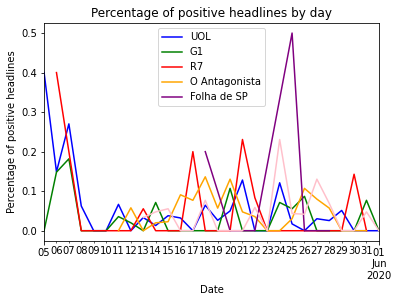

In [9]:
df_uol_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_positives["onlineStartDate"] = df_uol_positives["onlineStartDate"].dt.floor('d')
df_uol_positives_count = df_uol_positives.groupby("onlineStartDate").count()

df_uol_all["onlineStartDate"] = df_uol_all["onlineStartDate"].dt.floor('d')
df_uol_all_count = df_uol_all.groupby("onlineStartDate").count()
uol_positive_percentages_by_day = df_uol_positives_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_positive_percentages_by_day = uol_positive_percentages_by_day.fillna(0)
uol_positive_percentages_by_day.plot(color="blue")


df_g1_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_positives["onlineStartDate"] = df_g1_positives["onlineStartDate"].dt.floor('d')
df_g1_positives_count = df_g1_positives.groupby("onlineStartDate").count()

df_g1_all["onlineStartDate"] = df_g1_all["onlineStartDate"].dt.floor('d')
df_g1_all_count = df_g1_all.groupby("onlineStartDate").count()
g1_positive_percentages_by_day = df_g1_positives_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_positive_percentages_by_day = g1_positive_percentages_by_day.fillna(0)
g1_positive_percentages_by_day.plot(color="green")


df_r7_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_positives["onlineStartDate"] = df_r7_positives["onlineStartDate"].dt.floor('d')
df_r7_positives_count = df_r7_positives.groupby("onlineStartDate").count()

df_r7_all["onlineStartDate"] = df_r7_all["onlineStartDate"].dt.floor('d')
df_r7_all_count = df_r7_all.groupby("onlineStartDate").count()
r7_positive_percentages_by_day = df_r7_positives_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_positive_percentages_by_day = r7_positive_percentages_by_day.fillna(0)
r7_positive_percentages_by_day.plot(color="red")


df_antagonista_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_positives["onlineStartDate"] = df_antagonista_positives["onlineStartDate"].dt.floor('d')
df_antagonista_positives_count = df_antagonista_positives.groupby("onlineStartDate").count()

df_antagonista_all["onlineStartDate"] = df_antagonista_all["onlineStartDate"].dt.floor('d')
df_antagonista_all_count = df_antagonista_all.groupby("onlineStartDate").count()
antagonista_positive_percentages_by_day = df_antagonista_positives_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_positive_percentages_by_day = antagonista_positive_percentages_by_day.fillna(0)
antagonista_positive_percentages_by_day.plot(color="orange")


df_terca_livre_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["Terça Livre"]
df_terca_livre_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Terça Livre"]

df_terca_livre_positives["onlineStartDate"] = df_terca_livre_positives["onlineStartDate"].dt.floor('d')
df_terca_livre_positives_count = df_terca_livre_positives.groupby("onlineStartDate").count()

df_terca_livre_all["onlineStartDate"] = df_terca_livre_all["onlineStartDate"].dt.floor('d')
df_terca_livre_all_count = df_terca_livre_all.groupby("onlineStartDate").count()
terca_livre_positive_percentages_by_day = df_terca_livre_positives_count.loc[:, "headline"] / df_terca_livre_all_count.loc[:, "headline"]
terca_livre_positive_percentages_by_day = terca_livre_positive_percentages_by_day.fillna(0)
terca_livre_positive_percentages_by_day.plot(color="purple")


df_folha_positives = sentiments_dict["positive"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_positives["onlineStartDate"] = df_folha_positives["onlineStartDate"].dt.floor('d')
df_folha_positives_count = df_folha_positives.groupby("onlineStartDate").count()

df_folha_all["onlineStartDate"] = df_folha_all["onlineStartDate"].dt.floor('d')
df_folha_all_count = df_folha_all.groupby("onlineStartDate").count()
folha_positive_percentages_by_day = df_folha_positives_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_positive_percentages_by_day = folha_positive_percentages_by_day.fillna(0)
ax = folha_positive_percentages_by_day.plot(color="pink")

ax.legend(["UOL", "G1", "R7", "O Antagonista", "Folha de SP"])
ax.set_title("Percentage of positive headlines by day")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage of positive headlines")

Text(0, 0.5, 'Percentage of neutral headlines')

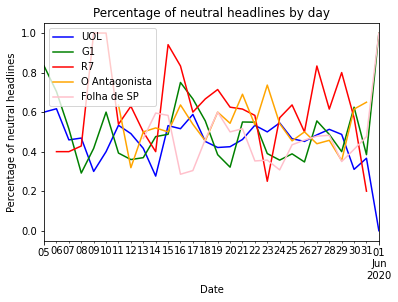

In [10]:
df_uol_neutral = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["UOL"]
df_uol_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["UOL"]

df_uol_neutral["onlineStartDate"] = df_uol_neutral["onlineStartDate"].dt.floor('d')
df_uol_neutral_count = df_uol_neutral.groupby("onlineStartDate").count()

df_uol_all["onlineStartDate"] = df_uol_all["onlineStartDate"].dt.floor('d')
df_uol_all_count = df_uol_all.groupby("onlineStartDate").count()
uol_neutral_percentages_by_day = df_uol_neutral_count.loc[:, "headline"] / df_uol_all_count.loc[:, "headline"]
uol_neutral_percentages_by_day = uol_neutral_percentages_by_day.fillna(0)
uol_neutral_percentages_by_day.plot(color="blue")


df_g1_neutral = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["G1"]
df_g1_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["G1"]

df_g1_neutral["onlineStartDate"] = df_g1_neutral["onlineStartDate"].dt.floor('d')
df_g1_neutral_count = df_g1_neutral.groupby("onlineStartDate").count()

df_g1_all["onlineStartDate"] = df_g1_all["onlineStartDate"].dt.floor('d')
df_g1_all_count = df_g1_all.groupby("onlineStartDate").count()
g1_neutral_percentages_by_day = df_g1_neutral_count.loc[:, "headline"] / df_g1_all_count.loc[:, "headline"]
g1_neutral_percentages_by_day = g1_neutral_percentages_by_day.fillna(0)
g1_neutral_percentages_by_day.plot(color="green")


df_r7_neutral = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["R7"]
df_r7_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["R7"]

df_r7_neutral["onlineStartDate"] = df_r7_neutral["onlineStartDate"].dt.floor('d')
df_r7_neutral_count = df_r7_neutral.groupby("onlineStartDate").count()

df_r7_all["onlineStartDate"] = df_r7_all["onlineStartDate"].dt.floor('d')
df_r7_all_count = df_r7_all.groupby("onlineStartDate").count()
r7_neutral_percentages_by_day = df_r7_neutral_count.loc[:, "headline"] / df_r7_all_count.loc[:, "headline"]
r7_neutral_percentages_by_day = r7_neutral_percentages_by_day.fillna(0)
r7_neutral_percentages_by_day.plot(color="red")


df_antagonista_neutral = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["O Antagonista"]
df_antagonista_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["O Antagonista"]

df_antagonista_neutral["onlineStartDate"] = df_antagonista_neutral["onlineStartDate"].dt.floor('d')
df_antagonista_neutral_count = df_antagonista_neutral.groupby("onlineStartDate").count()

df_antagonista_all["onlineStartDate"] = df_antagonista_all["onlineStartDate"].dt.floor('d')
df_antagonista_all_count = df_antagonista_all.groupby("onlineStartDate").count()
antagonista_neutral_percentages_by_day = df_antagonista_neutral_count.loc[:, "headline"] / df_antagonista_all_count.loc[:, "headline"]
antagonista_neutral_percentages_by_day = antagonista_neutral_percentages_by_day.fillna(0)
antagonista_neutral_percentages_by_day.plot(color="orange")


df_folha_neutral = sentiments_dict["neutral"]["Bolsonaro"]["dfs"]["Folha de SP"]
df_folha_all = sentiments_dict["all"]["Bolsonaro"]["dfs"]["Folha de SP"]

df_folha_neutral["onlineStartDate"] = df_folha_neutral["onlineStartDate"].dt.floor('d')
df_folha_neutral_count = df_folha_neutral.groupby("onlineStartDate").count()

df_folha_all["onlineStartDate"] = df_folha_all["onlineStartDate"].dt.floor('d')
df_folha_all_count = df_folha_all.groupby("onlineStartDate").count()
folha_neutral_percentages_by_day = df_folha_neutral_count.loc[:, "headline"] / df_folha_all_count.loc[:, "headline"]
folha_neutral_percentages_by_day = folha_neutral_percentages_by_day.fillna(0)
ax = folha_neutral_percentages_by_day.plot(color="pink")

ax.legend(["UOL", "G1", "R7", "O Antagonista", "Folha de SP"])
ax.set_title("Percentage of neutral headlines by day")
ax.set_xlabel("Date")
ax.set_ylabel("Percentage of neutral headlines")

# Weintraub

In [12]:
sentiments_dict["all"]["Weintraub"].keys()

dict_keys(['dfs', 'wordclouds', 'wordclouds_english'])